In [2]:
import pandas as pd
import numpy as np
from seaborn import kdeplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
C = pd.read_pickle("master_DF.pkl")

# Figure 1 | Asymmetric Audiences

In [3]:
C1 = C[C.cong_position.isin(["R", "D"])]

/Users/herbert/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


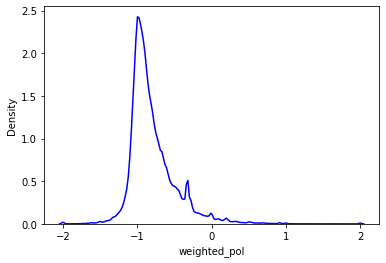

In [9]:
# xR,yR = kdeplot(C[C.cong_position == "R"].weighted_pol, color = "red", bw=0.05).lines[0].get_data()
xD,yD = kdeplot(C[C.cong_position == "D"].weighted_pol, color = "blue", bw=0.05).lines[0].get_data()

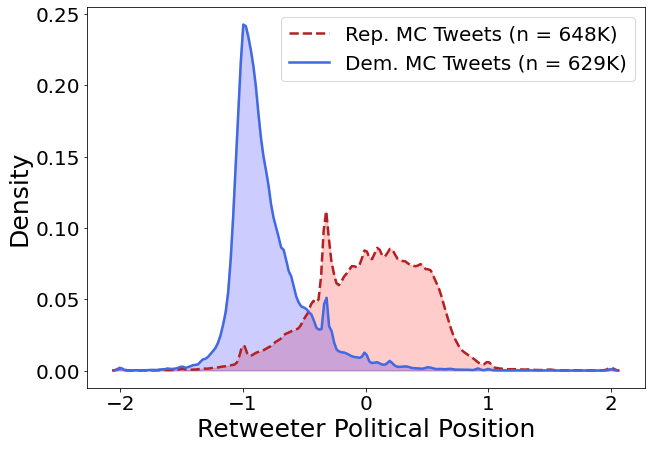

In [10]:
plt.figure(figsize=(10,7))

plt.plot(xR, yR/10, color = "firebrick", linewidth=2.5, linestyle="--",
        label = "Rep. MC Tweets (n = {})".format(str(len(C[C.cong_position == "R"]))[:3] + "K"))
plt.plot(xD, yD/10, color = "royalblue", linewidth=2.5, 
        label = "Dem. MC Tweets (n = {})".format(str(len(C[C.cong_position == "D"]))[:3] + "K"))

plt.fill_between(xR, 0, yR/10, color= "red", alpha=0.2 )
plt.fill_between(xR, 0, yD/10, color= "blue", alpha=0.2 )

# plt.fill_between(xR, 0, np.minimum(yR/10, yD/10), color= "yellow", alpha=0.3 )
# plt.fill_between(xD, 0, np.minimum(yR/10, yD/10), color= "yellow", alpha=0.3 )

plt.xlabel("Retweeter Political Position", fontsize=25)
plt.ylabel("Density", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)


In [12]:
C.iloc[:200].to_csv("master_DF_sample.csv")

## Figure 2 | Difference in Supply

In [16]:
CD = C[C.cong_position == "D"].sort_values("CAP_Policy")
CR = C[C.cong_position == "R"].sort_values("CAP_Policy")
CD = CD[CD.is_policy == 1]
CR = CR[CR.is_policy == 1]
X = CR.groupby("CAP_Policy")["weighted_pol"].count() - CD.groupby("CAP_Policy")["weighted_pol"].count()
YD = CD.groupby("CAP_Policy")["weighted_pol"].std()
YR = CR.groupby("CAP_Policy")["weighted_pol"].std()
TOPS = [
    "Macroeconomics", "Civil Rights", "Health", "Agriculture", "Labor",
    "Education", "Environment", "Energy", "Immigration", "Transportation",]
TOPS2 = [
    "Law and Crime", "Social Welfare", "Housing", "Domestic Commerce",
    "Defense", "Technology", "Foreign Trade", "International Affairs",
    "Government Operations", "Public Lands"
]
TOPS = TOPS + TOPS2
ID2Top = dict(zip(range(1,len(TOPS)+1), TOPS))
ID2Top[0] = "Not Policy"
X_tab = X.reset_index()
X_tab["Names"] = X_tab.CAP_Policy.apply(lambda x: ID2Top[x])
# X_tab.columns = ["CAP_Policy", "Supply_diff", "Policy_Name"]

/Users/herbert/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/herbert/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


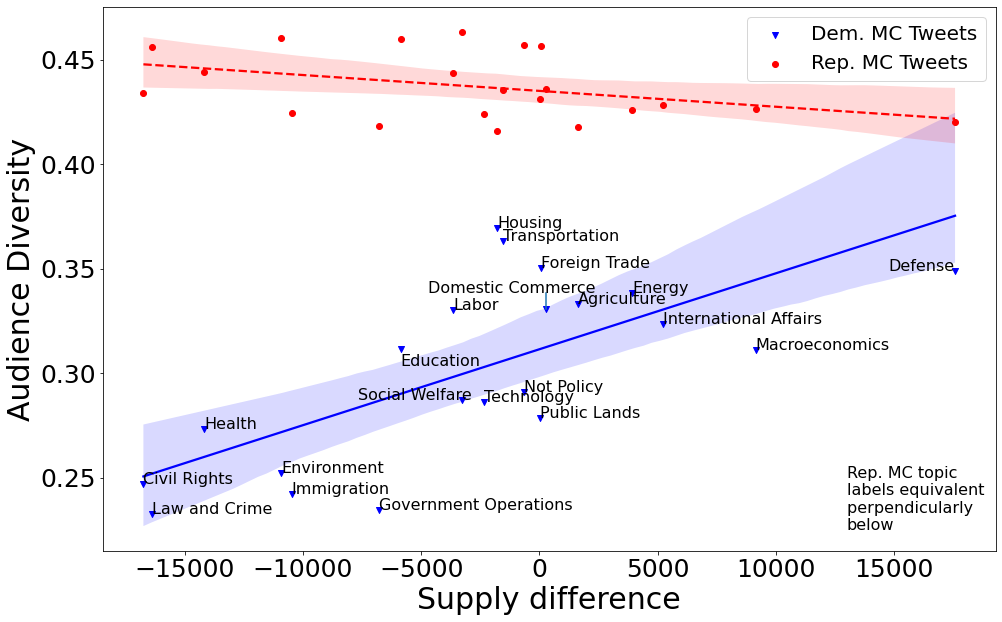

In [158]:
plt.figure(figsize=(16,10))
sns.regplot(X,YD, color = "blue", scatter_kws={"s":5})
sns.regplot(X,YR, color = "red", line_kws={"linestyle":"--"}, scatter_kws={"s":5})

plt.scatter(X,YD, color = "blue", label = "Dem. MC Tweets" , marker="v")
plt.scatter(X,YR, color = "red", label = "Rep. MC Tweets" )

plt.title("")
plt.xlabel("Supply difference", fontsize=30)
plt.ylabel("Audience Diversity", fontsize=30)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
for i,x in X_tab.iterrows():
    if x.Names == "Social Welfare":
        plt.annotate(X_tab.Names.values[i], (X[i]-4400, YD[i]), fontsize=16  )
    elif x.Names == "Domestic Commerce":
        plt.annotate(X_tab.Names.values[i], (X[i]-5000, YD[i]+0.008), fontsize=16  )
        plt.plot([X[i],X[i]], [YD[i],YD[i]+0.008])
    elif x.Names == "Defense":
        plt.annotate(X_tab.Names.values[i], (X[i]-2800, YD[i]), fontsize=16  )
    elif x.Names == "Education":
        plt.annotate(X_tab.Names.values[i], (X[i], YD[i]-0.008), fontsize=16  )
        
    else:
        plt.annotate(X_tab.Names.values[i], (X[i], YD[i]), fontsize=16  )
plt.legend(fontsize=20)

plt.annotate( "Rep. MC topic \nlabels equivalent \nperpendicularly \nbelow", (13000,0.225), fontsize=16 )

plt.savefig("figures/topic_regression_supply_vs_diversity-2.png")

##### Appendix S1

/Users/herbert/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/herbert/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

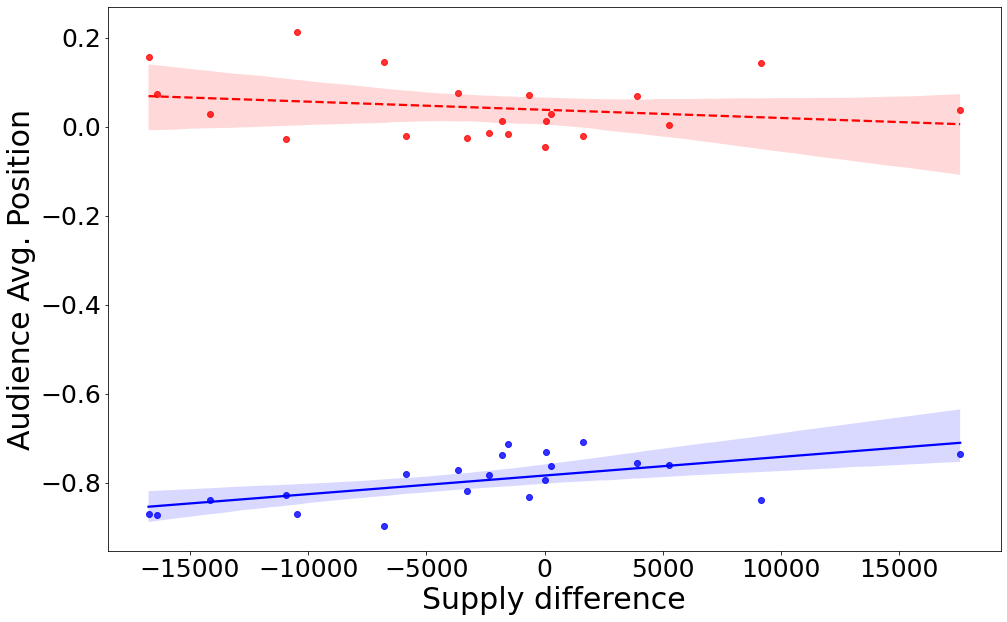

In [97]:
CD = C[C.cong_position == "D"].sort_values("CAP_Policy")
CR = C[C.cong_position == "R"].sort_values("CAP_Policy")
CD = CD[CD.is_policy == 1]
CR = CR[CR.is_policy == 1]
X = CR.groupby("CAP_Policy")["weighted_pol"].count() - CD.groupby("CAP_Policy")["weighted_pol"].count()
YD = CD.groupby("CAP_Policy")["weighted_pol"].mean()
YR = CR.groupby("CAP_Policy")["weighted_pol"].mean()
TOPS = [
    "Macroeconomics", "Civil Rights", "Health", "Agriculture", "Labor",
    "Education", "Environment", "Energy", "Immigration", "Transportation",]
TOPS2 = [
    "Law and Crime", "Social Welfare", "Housing", "Domestic Commerce",
    "Defense", "Technology", "Foreign Trade", "International Affairs",
    "Government Operations", "Public Lands"
]
TOPS = TOPS + TOPS2
ID2Top = dict(zip(range(1,len(TOPS)+1), TOPS))
ID2Top[0] = "Not Policy"
X_tab = X.reset_index()
X_tab["Names"] = X_tab.CAP_Policy.apply(lambda x: ID2Top[x])

plt.figure(figsize=(16,10))
sns.regplot(X,YD, color = "blue", label = "Dem. MC Tweets" )
sns.regplot(X,YR, color = "red", label = "Rep. MC Tweets" , line_kws={"linestyle":"--"})
plt.title("")
plt.xlabel("Supply difference", fontsize=30)
plt.ylabel("Audience Avg. Position", fontsize=30)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Figure 4

In [13]:
Y1 = C[C.cat == "Democrat In-Group"]
Y2 = C[C.cat == "Democrat Out-Group"]
Y3 = C[C.cat == "Republican In-Group"]
Y4 = C[C.cat == "Republican Out-Group"]

In [14]:
D = pd.read_pickle("master_RT_DF.pkl")
D.iloc[:1000].to_csv("master_RT_DF_sample.csv")

In [15]:
DR = D[D.weighted_pol > 0 ]
DD = D[D.weighted_pol < 0 ]
REP = DR.groupby(["Incivility"]).count()["cong_original_ID"]
DEM = DD.groupby(["Incivility"]).count()["cong_original_ID"]

/Users/herbert/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/herbert/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/herbert/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

Text(0.5, 1.0, 'b) Demand-side (User response to Toxicity)')

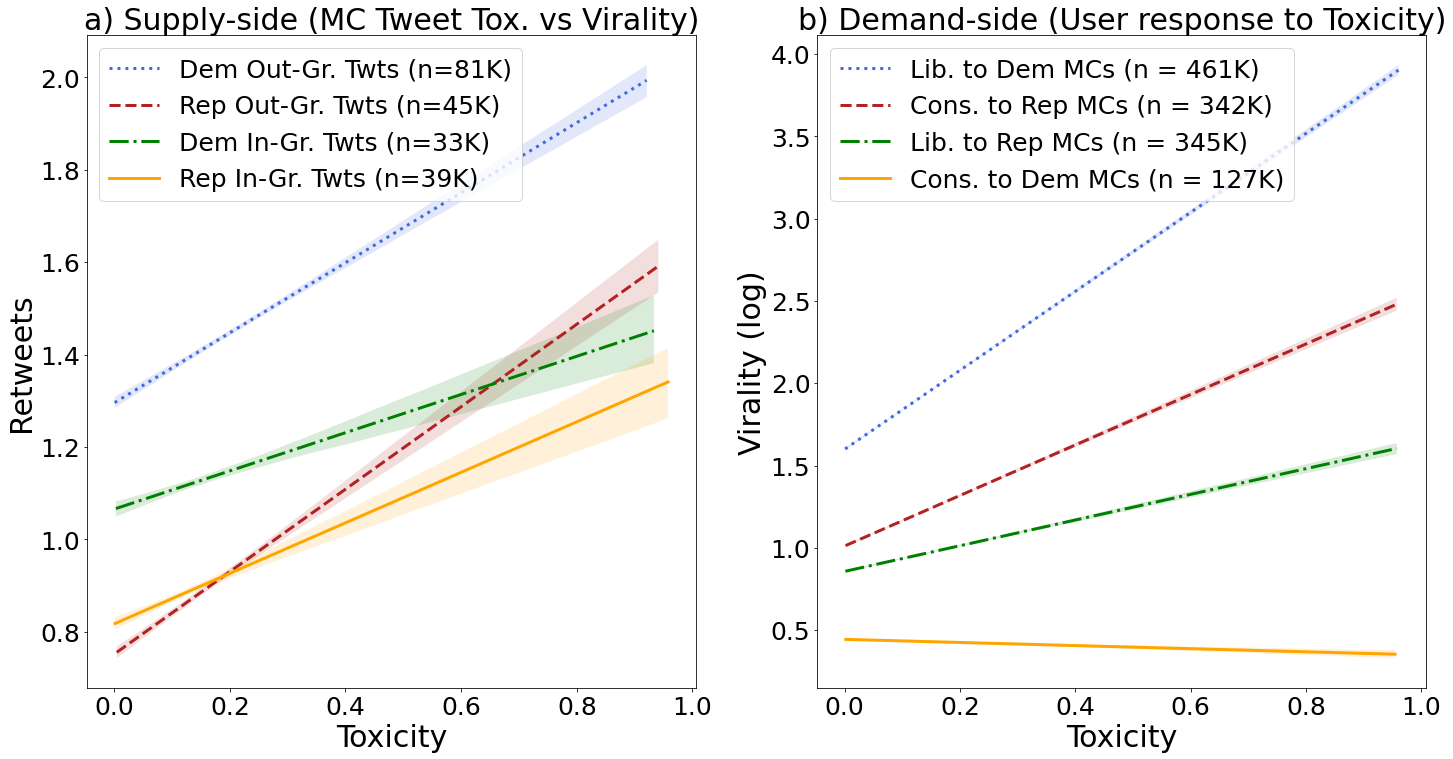

In [16]:
plt.figure(figsize=(24,12))

plt.subplot(1,2,1)
Y1 = C[C.cat == "Democrat In-Group"]
Y2 = C[C.cat == "Democrat Out-Group"]
Y3 = C[C.cat == "Republican In-Group"]
Y4 = C[C.cat == "Republican Out-Group"]

sns.regplot(Y2.Incivility, np.log10(Y2.Retweets+1), scatter=False, 
            label="Dem Out-Gr. Twts (n={})".format(str(round(len(Y2)*0.001)) + "K"), color="royalblue",
           line_kws={"linestyle":"dotted", "linewidth":3})
sns.regplot(Y4.Incivility, np.log10(Y4.Retweets+1), scatter=False, 
            label="Rep Out-Gr. Twts (n={})".format(str(round(len(Y4)*0.001)) + "K"), color="firebrick",
           line_kws={"linestyle":"--", "linewidth":3})
sns.regplot(Y1.Incivility, np.log10(Y1.Retweets+1), scatter=False, 
            label="Dem In-Gr. Twts (n={})".format(str(round(len(Y1)*0.001)) + "K"), color="green",
           line_kws={"linestyle":"-.", "linewidth":3})
sns.regplot(Y3.Incivility, np.log10(Y3.Retweets+1), scatter=False, 
            label="Rep In-Gr. Twts (n={})".format(str(round(len(Y3)*0.001)) + "K"), color="orange",
           line_kws={"linestyle":"-", "linewidth":3})

plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title("a) Supply-side (MC Tweet Tox. vs Virality)", fontsize=30)
plt.xlabel("Toxicity", fontsize=30)
plt.ylabel("Retweets", fontsize=30)


plt.subplot(1,2,2)

R_D = D[(D.weighted_pol > 0) & (D.cong_position == "D") ]
R_R = D[(D.weighted_pol > 0) & (D.cong_position == "R") ]
D_D = D[(D.weighted_pol < 0) & (D.cong_position == "D") ]
D_R = D[(D.weighted_pol < 0) & (D.cong_position == "R") ]

R_D = R_D.groupby(["Incivility"]).count()["cong_original_ID"]
R_R = R_R.groupby(["Incivility"]).count()["cong_original_ID"]
D_D = D_D.groupby(["Incivility"]).count()["cong_original_ID"]
D_R = D_R.groupby(["Incivility"]).count()["cong_original_ID"]

sns.regplot(D_D.index, np.log(D_D.values), scatter=False, 
            label="Lib. to Dem MCs (n = {})".format(str(round(len(D_D)*0.001)) + "K"), 
            color = "royalblue", line_kws={"linestyle":"dotted", "linewidth":3})
           
sns.regplot(R_R.index, np.log(R_R.values), scatter=False, 
            label="Cons. to Rep MCs (n = {})".format(str(round(len(R_R)*0.001)) + "K"), 
            color = "firebrick", line_kws={"linestyle":"--", "linewidth":3})

sns.regplot(D_R.index, np.log(D_R.values), scatter=False, 
            label="Lib. to Rep MCs (n = {})".format(str(round(len(D_R)*0.001)) + "K"), 
            color = "green", line_kws={"linestyle":"-.", "linewidth":3})

sns.regplot(R_D.index, np.log(R_D.values), scatter=False, 
            label="Cons. to Dem MCs (n = {})".format(str(round(len(R_D)*0.001)) + "K"), 
            color = "orange", line_kws={"linestyle":"-", "linewidth":3})

plt.legend(fontsize=25)
plt.xlabel("Toxicity", fontsize=30)
plt.ylabel("Virality (log)", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.title("b) Demand-side (User response to Toxicity)", fontsize=30)

# plt.savefig("figures/toxicity_effects_supply_demand-3.png")

In [11]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [12]:
B0, B1, reg_line = linear_regression(np.array( D_R.index ), np.log(D_R.values))
print('Regression Line: ', reg_line)
R = corr_coef(np.array( D_R.index ), np.log(D_R.values))
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 0.8569644521146974 + 0.78β
Correlation Coef.:  0.0741251384405667
"Goodness of Fit":  0.00549453614883318


In [13]:
B0, B1, reg_line = linear_regression(np.array( R_D.index ), np.log(R_D.values))
print('Regression Line: ', reg_line)
R = corr_coef(np.array( R_D.index ), np.log(R_D.values))
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 0.44419797107912884 + -0.094β
Correlation Coef.:  -0.017133108420332704
"Goodness of Fit":  0.0002935434041428754


In [15]:
B0, B1, reg_line = linear_regression(np.array( D_D.index ), np.log(D_D.values))
print('Regression Line: ', reg_line)
R = corr_coef(np.array( D_D.index ), np.log(D_D.values))
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 1.5988025561666368 + 2.398β
Correlation Coef.:  0.19053619470406002
"Goodness of Fit":  0.03630404149230347


In [14]:
B0, B1, reg_line = linear_regression(np.array( R_R.index ), np.log(R_R.values))
print('Regression Line: ', reg_line)
R = corr_coef(np.array( R_R.index ), np.log(R_R.values))
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 1.0111614166954326 + 1.534β
Correlation Coef.:  0.12072508825208508
"Goodness of Fit":  0.014574546933473731


In [16]:
2.398 / 1.534

1.563233376792699

### Table 1

In [126]:
center = C.Incivility.mean() + C.Incivility.std()
center

0.23672989742842554

In [128]:
R = C[C.cong_position == "R"]
D = C[C.cong_position == "D"]
R["is_incivil"] = R.Incivility > center
D["is_incivil"] = D.Incivility > center

/var/folders/0w/2wvbn9xx39scmwd7157fzlw80000gn/T/ipykernel_25412/406857433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R["is_incivil"] = R.Incivility > center
/var/folders/0w/2wvbn9xx39scmwd7157fzlw80000gn/T/ipykernel_25412/406857433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D["is_incivil"] = D.Incivility > center


In [129]:
R.groupby(["is_policy", "is_incivil"])["Likes"].count() / len(R)

is_policy  is_incivil
0          False         0.414547
           True          0.031294
1          False         0.487158
           True          0.067002
Name: Likes, dtype: float64

In [116]:
R.groupby(["is_policy", "is_incivil"])["Likes"].count() / len(R)

is_policy  is_incivil
0          False         0.343412
           True          0.102429
1          False         0.370092
           True          0.184067
Name: Likes, dtype: float64

In [130]:
D.groupby(["is_policy", "is_incivil"])["Likes"].count() / len(D)

is_policy  is_incivil
0          False         0.322725
           True          0.033139
1          False         0.525882
           True          0.118254
Name: Likes, dtype: float64

In [114]:
D.groupby(["is_policy", "is_incivil"])["Likes"].count() / len(D)

is_policy  is_incivil
0          False         0.262584
           True          0.093279
1          False         0.365269
           True          0.278867
Name: Likes, dtype: float64

In [41]:
D.is_incivil.sum() / len(D), R.is_incivil.sum() / len(R)

(0.22629991290472284, 0.15529453875574906)

In [36]:
D.groupby(["is_policy", "is_incivil"])["Likes"].count() / len(D)

is_policy  is_incivil
0          False         0.351593
           True          0.004271
1          False         0.633949
           True          0.010188
Name: Likes, dtype: float64

In [39]:
R.groupby(["is_policy", "is_incivil"])["Likes"].count() / len(R)

is_policy  is_incivil
0          False         0.395090
           True          0.050751
1          False         0.449616
           True          0.104544
Name: Likes, dtype: float64

In [26]:
C.Incivility.mean(), C.Incivility.median()

(0.13493871404996285, 0.10317002)

## Figure 7

In [17]:
# %%time
DR = D[D.weighted_pol > 0 ]
DD = D[D.weighted_pol < 0 ]

X = CR.groupby("CAP_Policy")["weighted_pol"].count() - CD.groupby("CAP_Policy")["weighted_pol"].count()
X = X.sort_values(ascending=False)
X_tab = X_tab.sort_values("weighted_pol", ascending = False)

dem_slopes = DS = []
rep_slopes = RS = []
for i in X.index:
    REP = DR[DR.CAP_Policy == i].groupby(["Incivility"]).count()["cong_original_ID"]
    DEM = DD[DD.CAP_Policy == i].groupby(["Incivility"]).count()["cong_original_ID"]
    slope_R, intercept, r, p, std_err = stats.linregress(REP.index, np.log(REP.values))
    slope_D, intercept, r, p, std_err = stats.linregress(DEM.index, np.log(DEM.values))
    dem_slopes.append(slope_D)
    rep_slopes.append(slope_R)
    

/Users/herbert/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/herbert/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


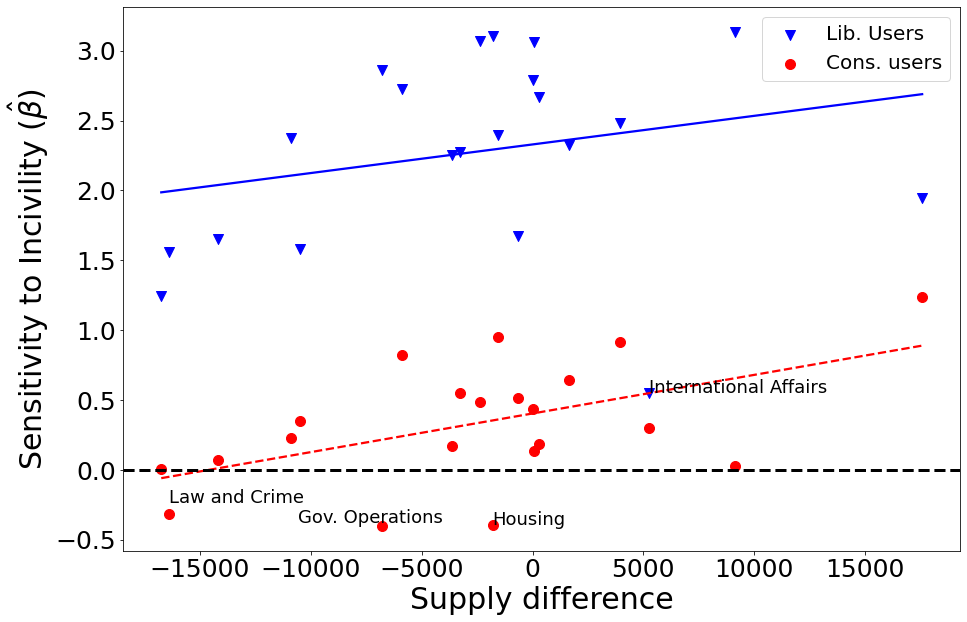

In [175]:
plt.figure(figsize=(15,10))
sns.regplot(X.values, dem_slopes, color = "blue", ci=0, scatter_kws={"s":5})
sns.regplot(X.values, rep_slopes, color = "red", ci=0,  
            line_kws={"linestyle":"--"}, scatter_kws={"s":5})


plt.scatter(X.values, dem_slopes, color = "blue", label = "Lib. Users" , marker="v", s=100)
plt.scatter(X.values, rep_slopes, color = "red", label = "Cons. users" , s=100)


plt.xlabel("Supply difference", fontsize=30)
plt.ylabel(r"Sensitivity to Incivility ($\hat{\beta}$)", fontsize=30)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.axhline(y=0, linestyle="--", linewidth = 3, color = "k")

for i,x in enumerate(X):
    if X_tab.Names.values[i] == "International Affairs":
        plt.annotate(X_tab.Names.values[i], (X_tab.weighted_pol.values[i], dem_slopes[i]),  fontsize=18  )

for i,x in enumerate(X):
    if rep_slopes[i] < 0:
        if X_tab.Names.values[i] == "Government Operations":
            plt.annotate("Gov. Operations", (X_tab.weighted_pol.values[i]-3800, rep_slopes[i]+0.02) ,  fontsize=18  )
        elif X_tab.Names.values[i] == "Law and Crime":
            plt.annotate(X_tab.Names.values[i], (X_tab.weighted_pol.values[i], rep_slopes[i]+0.08) ,  fontsize=18  )
        else:
            plt.annotate(X_tab.Names.values[i], (X_tab.weighted_pol.values[i], rep_slopes[i]) , fontsize=18  )

plt.legend(fontsize=20)
# plt.savefig("figures/topic_incivility_regression.png")

In [387]:
X_tab["Dem. Beta"] = dem_slopes
X_tab["Rep. Beta"] = rep_slopes

In [388]:
X_tab

,CAP_Policy,weighted_pol,Names,Dem. Beta,Rep. Beta
15,15,17578,Defense,1.947447,1.236853
1,1,9148,Macroeconomics,3.134636,0.026845
18,18,5246,International Affairs,0.551600,0.301626
8,8,3931,Energy,2.485579,0.919327
4,4,1647,Agriculture,2.325239,0.644451
14,14,272,Domestic Commerce,2.665562,0.184382
17,17,73,Foreign Trade,3.063597,0.137203
20,20,32,Public Lands,2.789430,0.434100
0,0,-668,Not Policy,1.675464,0.511957
10,10,-1552,Transportation,2.398488,0.952559
